In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
# from sklearn.metrics import accuracy_score
# We will use matplotlib, seaborn and sklearn for visuals

# Figures inline of the page (within the page) and set visualization style
%matplotlib inline
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()
# Or you can see certain numbers like train_data.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is the test data information. 
The descriptions of the variables are as follows:
1. PassengerId - this is a just a generated Id
2. Pclass - which class did the passenger ride - first, second or third
3. Name - self explanatory
4. Sex - male or female
5. Age - Self explanatory
6. SibSp - If the passenger's spouse or siblings with them on the ship
7. Parch - If the passenger's parents or children with them on the ship
8. Ticket - ticket number
9. Fare - ticker price
10. Cabin
11. Embarked - port of embarkation
12. Survived - did the passenger survive the sinking of the Titanic?

The goal of the project is to determine predict the survival probability of a person based on the features given

In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()
# You will notice that it doesn't have survived column as we are trying to predict that

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# We can learn more about the data using info function:
train_data.info()
#Although this will give you are all same null value b/c we fixed it, if never done any analysis, 
# you can expect to have less non-null values, indicating there are missing values

# We can also use decribe to get summary stats
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Train data is the whole data set. When we call len(train_data), we find the no. of rows

In [7]:
print("The total number of passengers:",len(train_data))

The total number of passengers: 891


We can access a specific column in a data frame by specifying its name in square brackets. We can also filter the values we are interested in with a condition

In [8]:
print(train_data[train_data["Survived"] == 1])

     PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ... 

In [9]:
print("The total number of people who survived:", len(train_data[train_data["Survived"]==1]))
# This will return a bunch of Boolean: [train_data["Survived"]==1]

The total number of people who survived: 342


# Different Visualization that you can see
We will be using Seaborn to do different viz


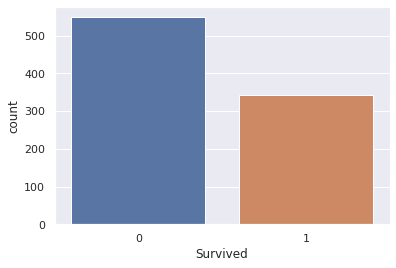

In [10]:
sns.countplot(x="Survived", data=train_data)
# 1 is for survived and 0 is died
# We see that majority of people died

In [11]:
# Our ultimate goal is to submit the passengerid and survived as seen from submission.csv file

# Sort by Gender

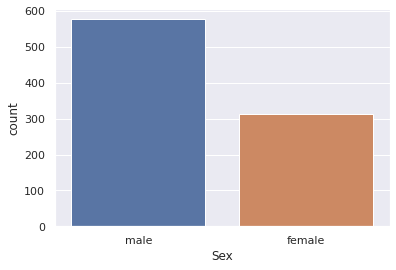

In [12]:
#Create a visual by gender
sns.countplot(x="Sex", data=train_data)
# We are using countplot function
# we see that there are more female than male 

In [13]:
# print(train_data["Survived"][train_data["Sex"] == "male"])
# This will give all the rows where sex is male and then all the people who survived and died. 
# So mix of both 0 and 1. 

#Next line of code is
#print 100 multiplied by the mean of the "survived" column but only where the sex is "male" 
# Reason for multiplying by 100 is b/c we want as a percentage

print("% of men who survived", 100*np.mean(train_data["Survived"][train_data["Sex"] == "male"]))
print("% of women who survived", 100*np.mean(train_data["Survived"][train_data["Sex"] == "female"]))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [14]:
#This earlier code might seen confusing. Other way to do it:
train_data.groupby(["Sex"]).Survived.sum()
#This will tell how many men and women survived


Sex
female    233
male      109
Name: Survived, dtype: int64

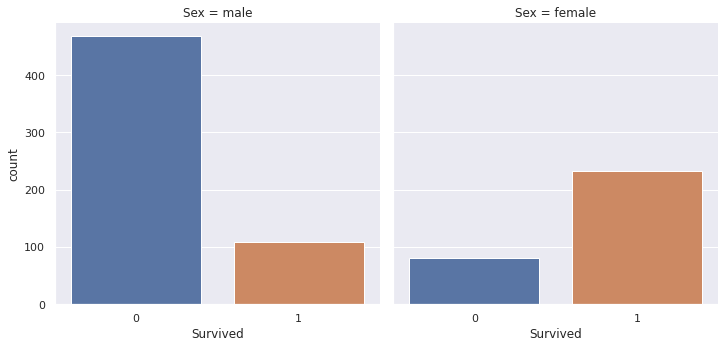

In [15]:
# A super interesting visual of this is bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex':

sns.catplot(x="Survived", col="Sex", kind="count", data=train_data)


This tells us that women are more likely going to survive than men
Note that 0 is died while 1 is survived

# Sort by Class


In [16]:
# People in first class that survived:
print("% of people in first class: ", 100*np.mean(train_data["Survived"][train_data["Pclass"] == 1]))

# People in second class that survived:
print("% of people in second class: ", 100*np.mean(train_data["Survived"][train_data["Pclass"] == 2]))

# People in third class that survived:
print("% of people in third class: ", 100*np.mean(train_data["Survived"][train_data["Pclass"] == 3]))

% of people in first class:  62.96296296296296
% of people in second class:  47.28260869565217
% of people in third class:  24.236252545824847


In [17]:
# Finding the percentage of children who survived

print("% of children who survived", 100*np.mean(train_data["Survived"][train_data["Age"] < 18]))
print("% of adults who survived", 100*np.mean(train_data["Survived"][train_data["Age"] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


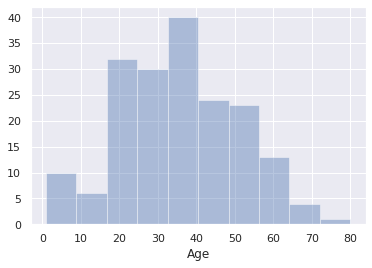

In [18]:
# This is a plot to see the demographic by age
train_data_drop = train_data.dropna()
sns.distplot(train_data_drop.Age, kde=False)

# Sort by Class


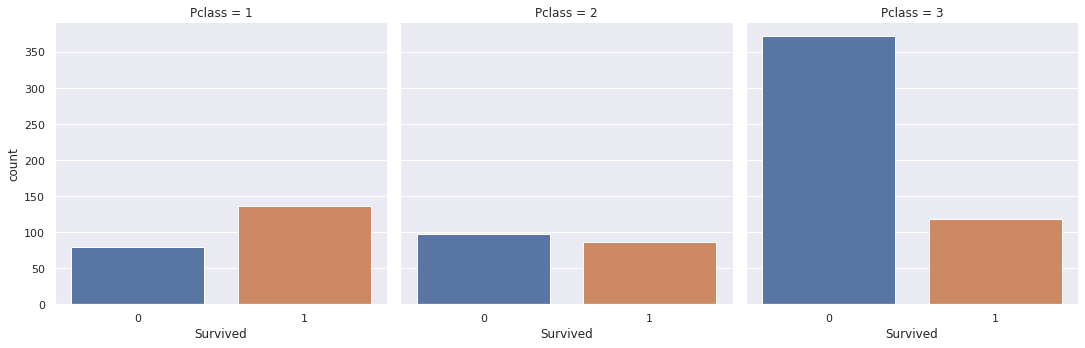

In [19]:
sns.catplot(x="Survived", col="Pclass", kind="count", data=train_data)

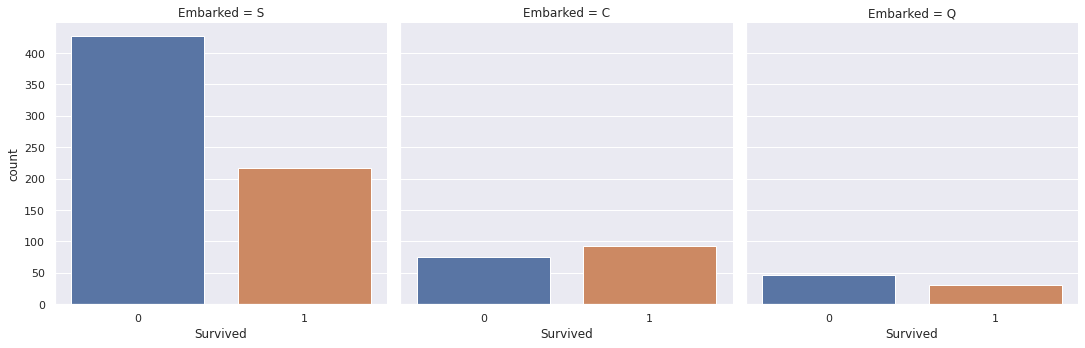

In [20]:
# We see that people in class 1 were more likely to survive (higher orange than blue) while people in class 3 were more likely to die

# Lets tests embarked option:
sns.catplot(x="Survived", col="Embarked", kind= "count", data=train_data)


In [21]:
# We see that people who were on S class were less likely to survive than people on C, Q class

# EDA using some numeric data


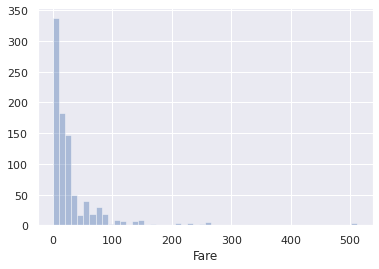

In [22]:
sns.distplot(train_data.Fare, kde=False)
#Tells most passenger paid less than 100 for Titanic

# Data PreProcessing

Since we are interested in numeric data. We are going to convert non-numeric data into numeric data.
The male is 1 and female is 0

In [23]:
train_data["Sex"] = train_data["Sex"].apply(lambda x: 1 if x == "male" else 0)

In [24]:
# print(train_data.isnull()) => Will list down each value as True or False,
# with True as missing value/Nan or False as not missing value
# train_data.isnull().sum() finds the total sum of missing values in each COLUMN and NOT row

print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [32]:
#Note that train_data.isnull().sum() or df.isnull().sum(axis=0) is the same

#But to find the total sum of missing value in each row you do
#df.isnull().sum(axis=1)

This above code tells that **Age** has a lot of missing value, along with **cabin** and **embarked**

To deal with the missing data, we will fill them out using the mean value, filna() function is required. Fillna will replace all the Nan value in each col with the mean in this case

In [26]:
# Dealing with Age
train_data["Age"] = train_data["Age"].fillna(np.mean(train_data["Age"]))
#print(train_data["Age"])
print(train_data["Age"].isnull().sum()) # We verified its all filled

0


In [27]:
# Dealing with Embarked
#Seeing whats inside the column
train_data["Embarked"]


# Need to learn how to deal with mssing categorical data

# Looking at frequency of each values in 'Embarked'
train_data["Embarked"].value_counts()
# Or titanic.Embarked.value_counts()

#Filling in the missing data with s as its the majority
train_data.Embarked.fillna(value='S', axis = 0, inplace = True) #rowwise input

#print(train_data["Embarked"].isnull().sum())

We want to remove the unnecessary columns which aren't going to be useful like Ticket number, Cabin, ID and Name.

In [36]:
train_data = train_data[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
print(train_data)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0           0       3    1  22.000000      1      0   7.2500
1           1       1    0  38.000000      1      0  71.2833
2           1       3    0  26.000000      0      0   7.9250
3           1       1    0  35.000000      1      0  53.1000
4           0       3    1  35.000000      0      0   8.0500
..        ...     ...  ...        ...    ...    ...      ...
886         0       2    1  27.000000      0      0  13.0000
887         1       1    0  19.000000      0      0  30.0000
888         0       3    0  29.699118      1      2  23.4500
889         1       1    1  26.000000      0      0  30.0000
890         0       3    1  32.000000      0      0   7.7500

[891 rows x 7 columns]


We will now separate the X and Y variables

In [38]:
X = train_data.drop("Survived", axis = 1)
y = train_data["Survived"]

# Training and Testing

The validation data would be used to evaluate the model, while the training data would be used to train the data. To do that, we can use the function "train_test_split" from the sklearn module

In [39]:
!pip install sklearn
# Notice there is an exclamation mark

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Note that X and y are very important as they have been defined before

# Building ML Model
We can train the model.

First, we need to import our model - A decision tree classifier (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Now that we have the model, we need to evaluate it

# Model Validation

Let's evaulate it with using the **accuracy_score** function. This output of the function is the number of right answers (passengers survival/death was predicted correctly) divided by the total number of passengers (Not entirely sure what this means)

In [42]:
!pip install graphviz

In [44]:
from sklearn.metrics import accuracy_score
print('Training accuracy is: ', accuracy_score(y_train, model.predict(X_train)))
#See the syntax carefully, which is the model.predict

print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy is:  0.9798657718120806
Test accuracy 0.7322033898305085


# This is the first learning challenge
We see that the model overfits i.e it perfectly fits the training dataset with 98% accuracy but it gives less accurate result of 76% on the unseen data. So instead of learning the general rules that can be applied on unseen data, it does something that is more similar to memorize the training data.

In [46]:
#Lets try to visualize it
from sklearn.tree import export_graphviz
import graphviz

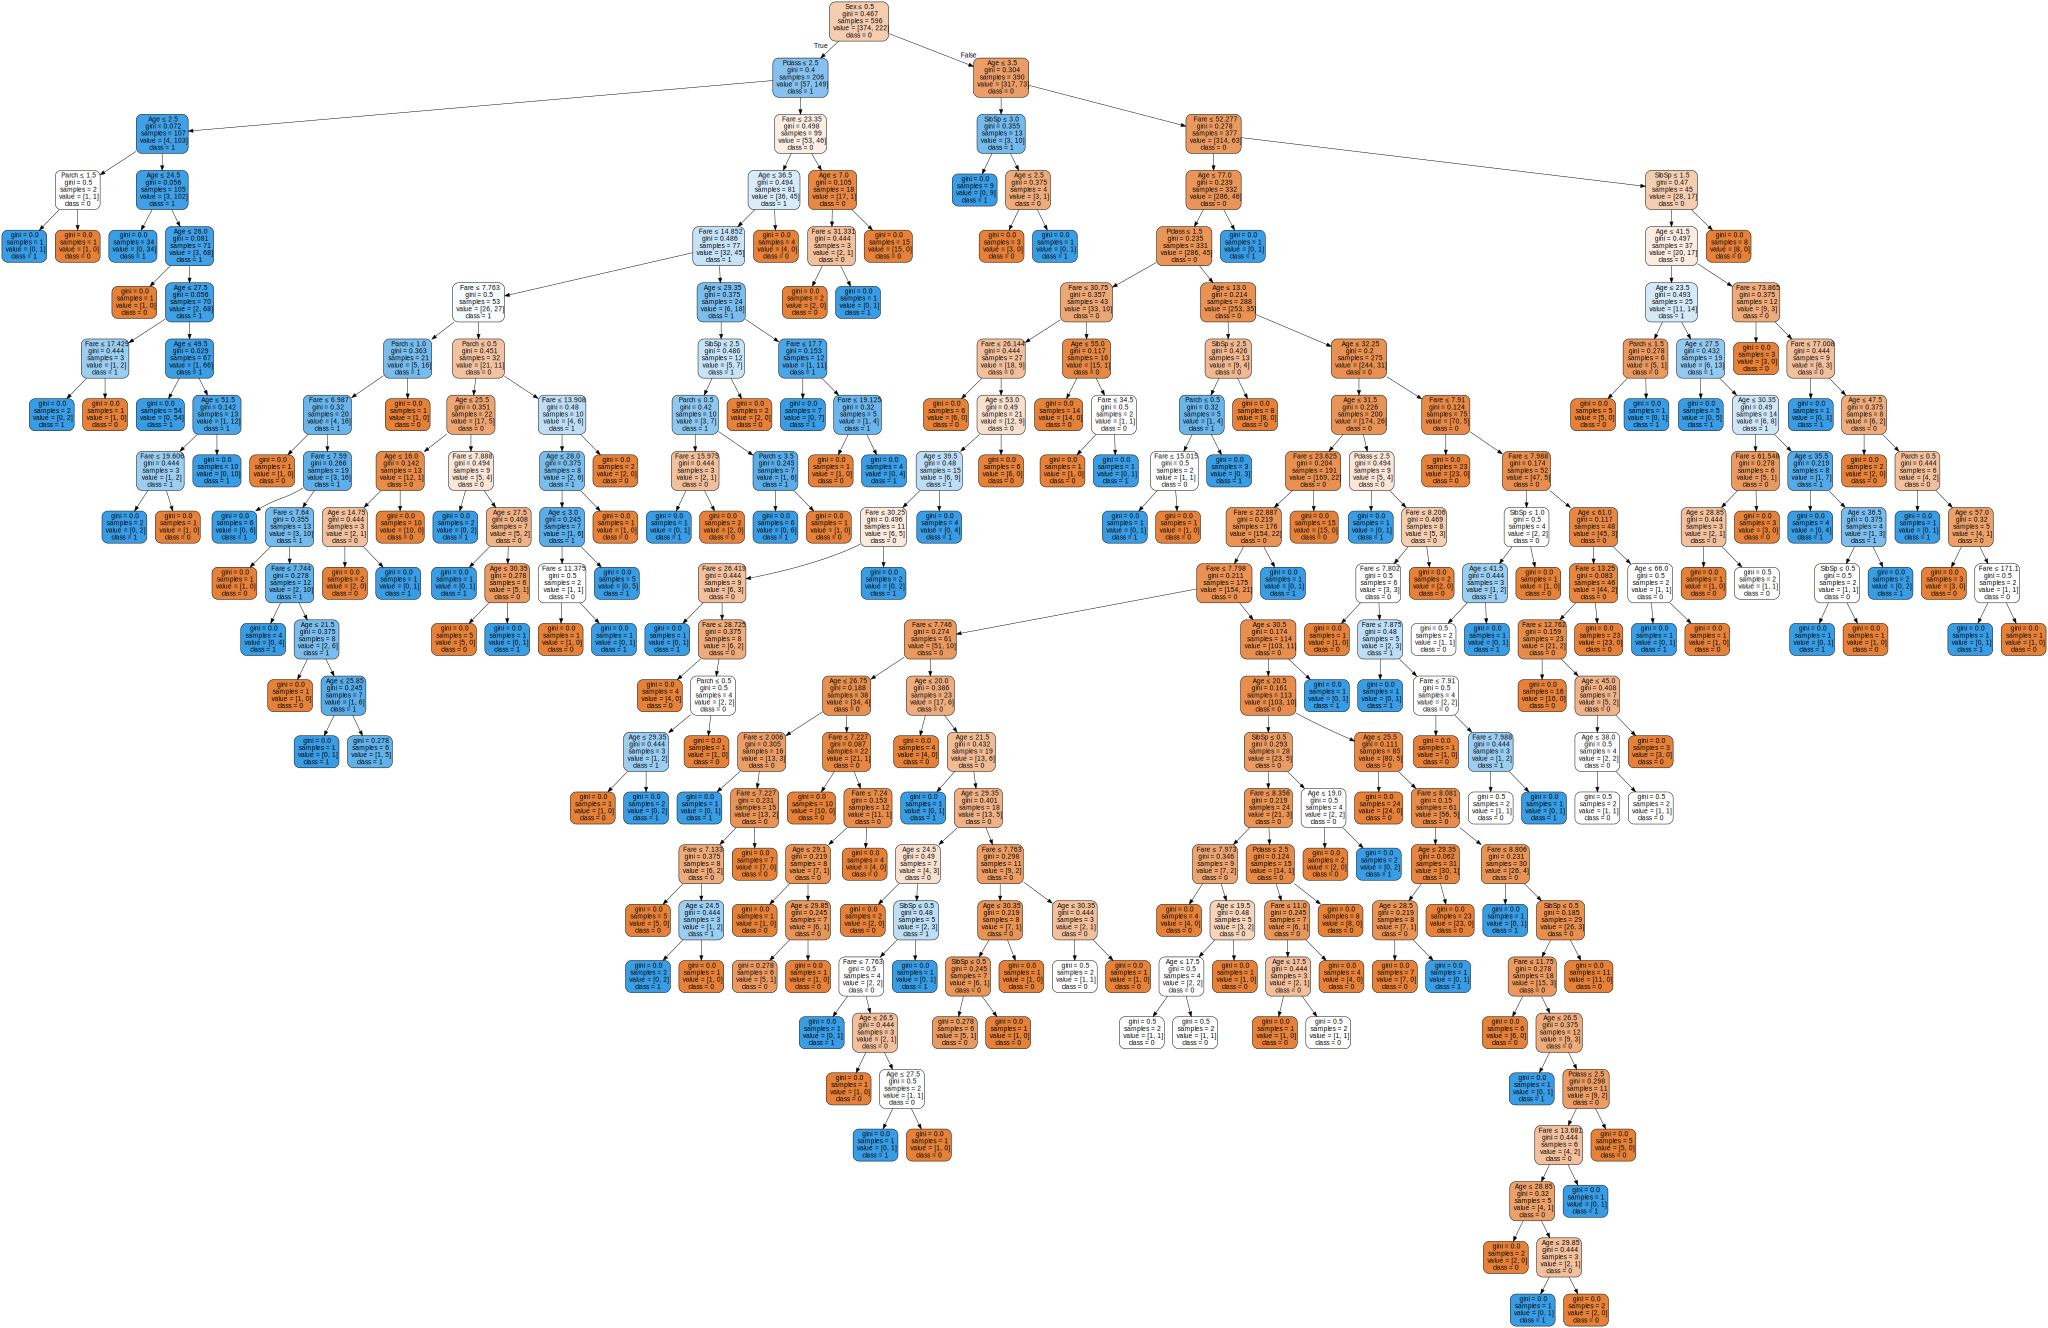

In [47]:
dot_data= export_graphviz(model, out_file=None, 
                    feature_names=X_test.columns,  
                      class_names=["0", "1"],  
                      filled=True, rounded=True,  
                      special_characters=True)
graph1=graphviz.Source(dot_data)
graph1

This tells us that the machine learned a complex rules to solve this issue to memorize the survival or death of each passenger in the training data.

We can tackle overfitting by selecting less features, so the tree will ask less questions/less branches 

We will create max of 3 questions for it to test


In [48]:
#Learn this and memorize it

improved_model = DecisionTreeClassifier(max_depth = 3)
improved_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [50]:
print("Train score is:" , accuracy_score(y_train, improved_model.predict(X_train)))
print("Test score is:", accuracy_score(y_test, improved_model.predict(X_test)))

Train score is: 0.8238255033557047
Test score is: 0.8203389830508474


What we learned here is that while the train score went down, the test score has improved and it is now almost as high as the train score. **This means that the model does not overfit as badly anymore.**

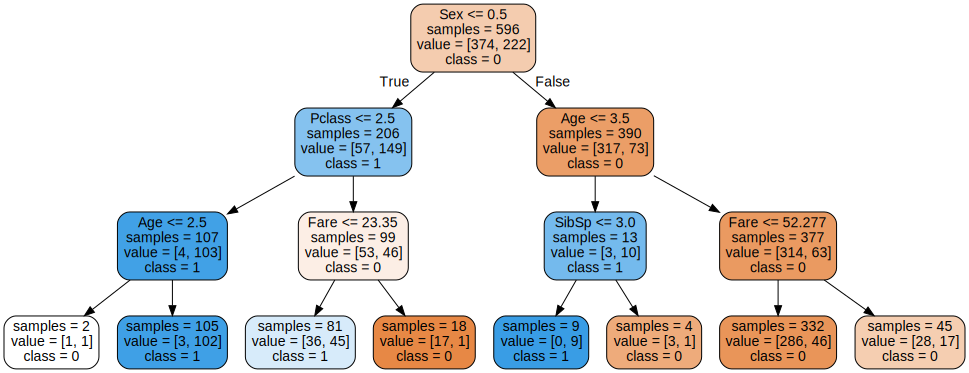

In [51]:
dot_data= export_graphviz(improved_model, out_file=None,impurity=False, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True)
graph2=graphviz.Source(dot_data)
graph2